In [1]:
#importing lib 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px   # for 3d plots 
import plotly.graph_objs as go
import plotly.offline as py
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:

#reading data
data=pd.read_csv('Mall_Customers.csv')

In [3]:
data

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]

### Data exploraion

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


From above we can see that their are no null values in the dataset, and we have Gender as the object ,so we need to handle this object value later while segmenting the customers.

In [7]:
data.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

In [8]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

If we look at then average customer are around the age of 38 and we have the cutomers:
* having age between 18-70. 
* Having annual income between 15-137($K).
* having avg spend score of 50.

We can also look the distribution of ages to see the avg ages of customers

## Data Visulization

<Axes: xlabel='Age', ylabel='count'>

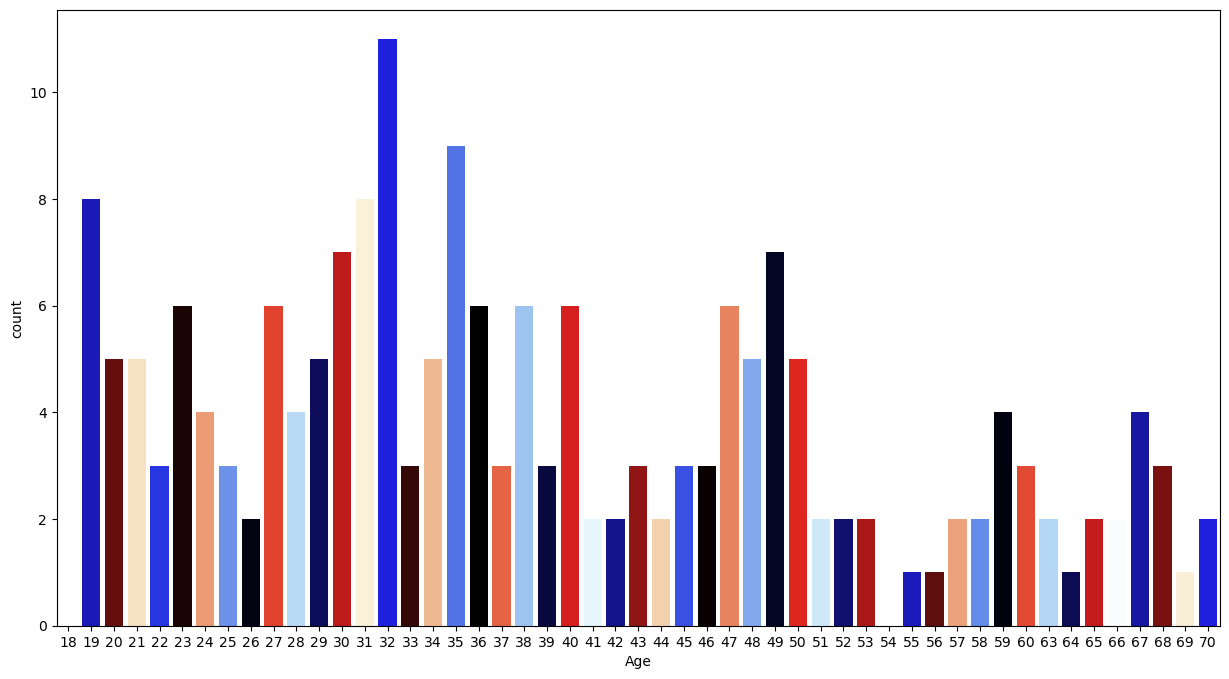

In [11]:
plt.figure(figsize=(15,8))
sns.countplot(data=data,x='Age',palette='flag')

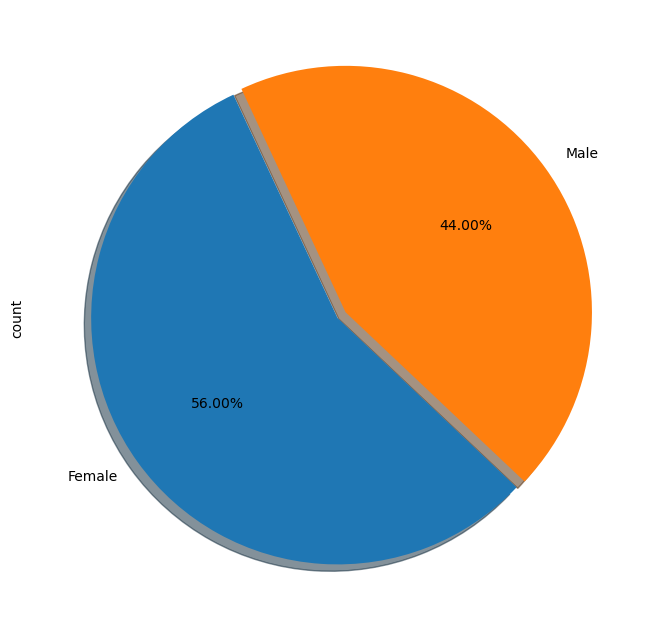

In [12]:
plt.figure(figsize=(8,8))
data['Gender'].value_counts().plot(kind='pie',autopct='%.2f%%',shadow=True,startangle=115,explode=(0,0.04))
plt.show()

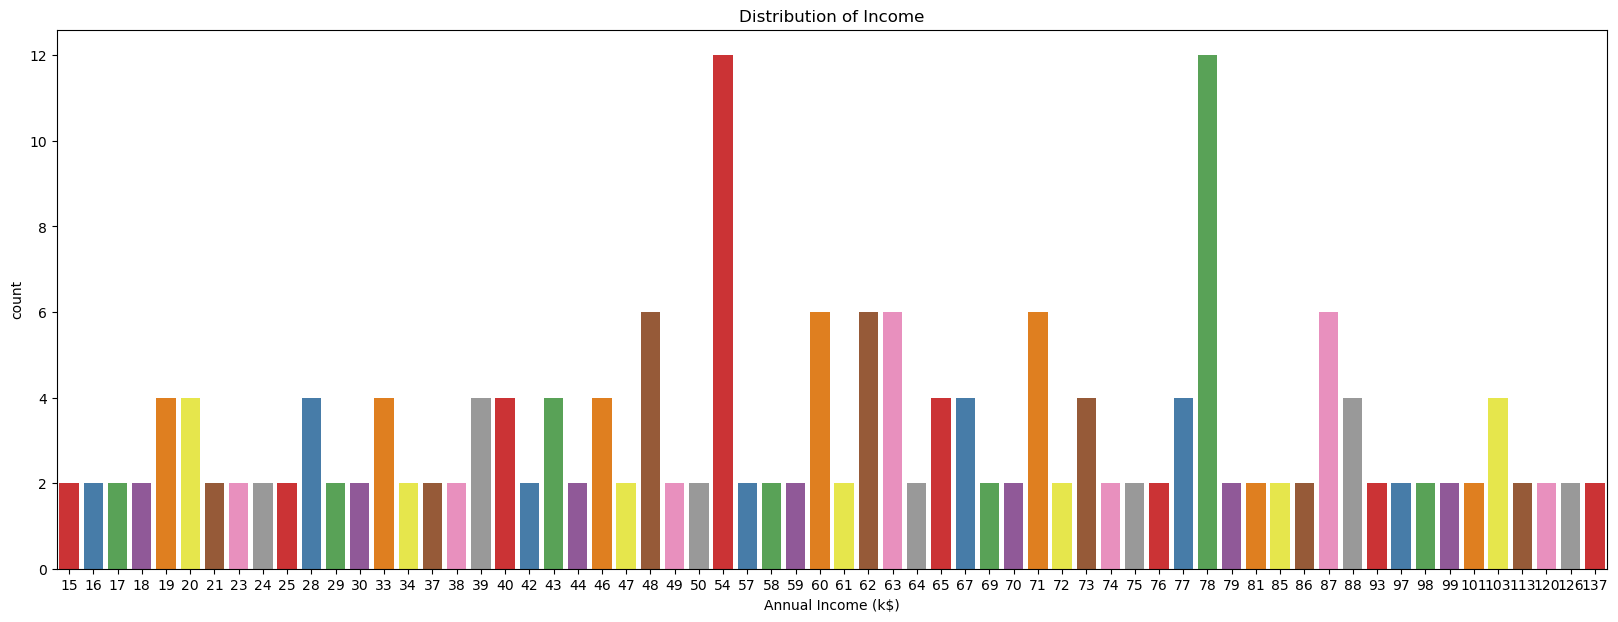

In [13]:


plt.figure(figsize=(20, 7))
sns.countplot(x="Annual Income (k$)", data=data, palette='Set1')
plt.title('Distribution of Income')
plt.show()

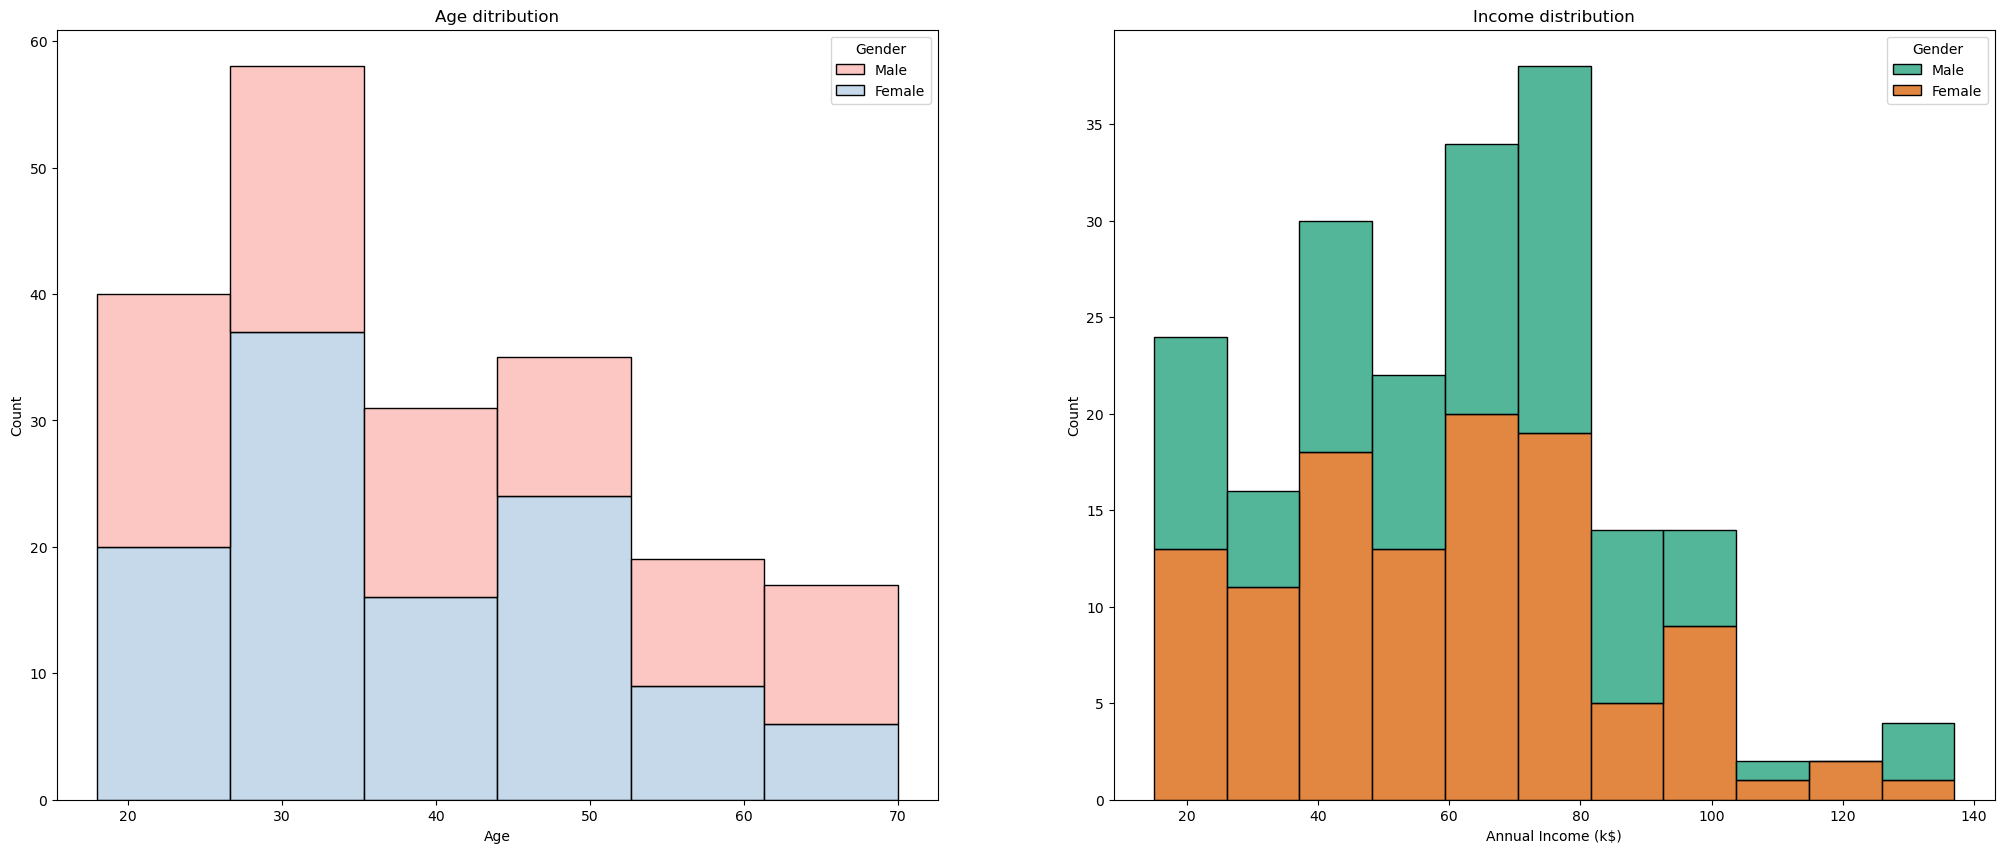

In [14]:
_,(ax0, ax1) = plt.subplots(1, 2, figsize=(25, 10))  ##plotting 2 plots
sns.histplot(data=data, x='Age', hue='Gender', binwidth=9, multiple='stack', ax=ax0,palette='Pastel1').set_title('Age ditribution') ##plot for age distribution
sns.histplot(data=data, x='Annual Income (k$)', hue='Gender', binwidth=11, multiple='stack', ax=ax1,palette='Dark2').set_title('Income distribution') #plot for income distribution
plt.show()

Text(0, 28, 'Annual Income Distribution')

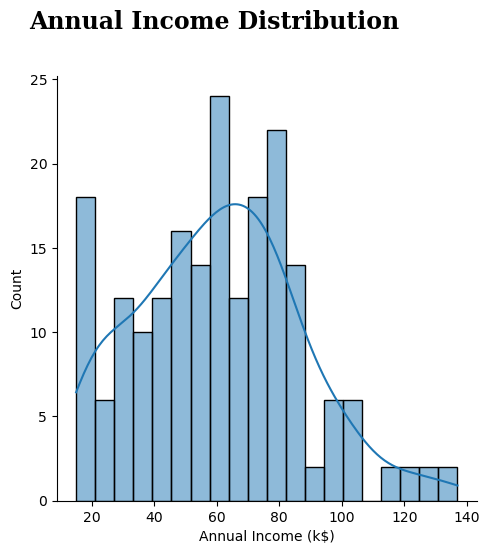

In [15]:
sns.displot(x="Annual Income (k$)", data=data, kde=True, bins=20)  ##kde plot for annual income
plt.text(0, 28, 'Annual Income Distribution', fontfamily='serif', fontsize=17, fontweight='bold')

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

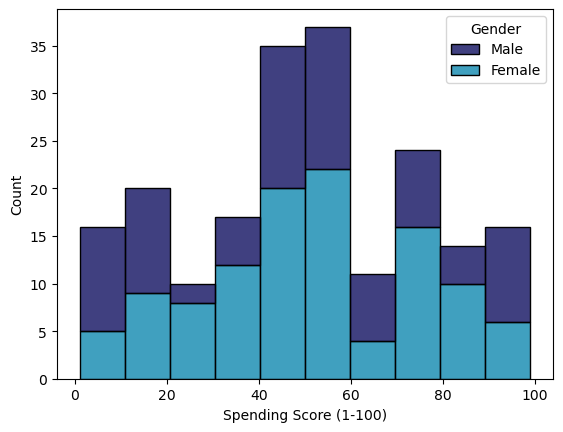

In [16]:
sns.histplot(data=data, x='Spending Score (1-100)', hue='Gender', binwidth=10, multiple='stack',palette='ocean') #ploting their spend score

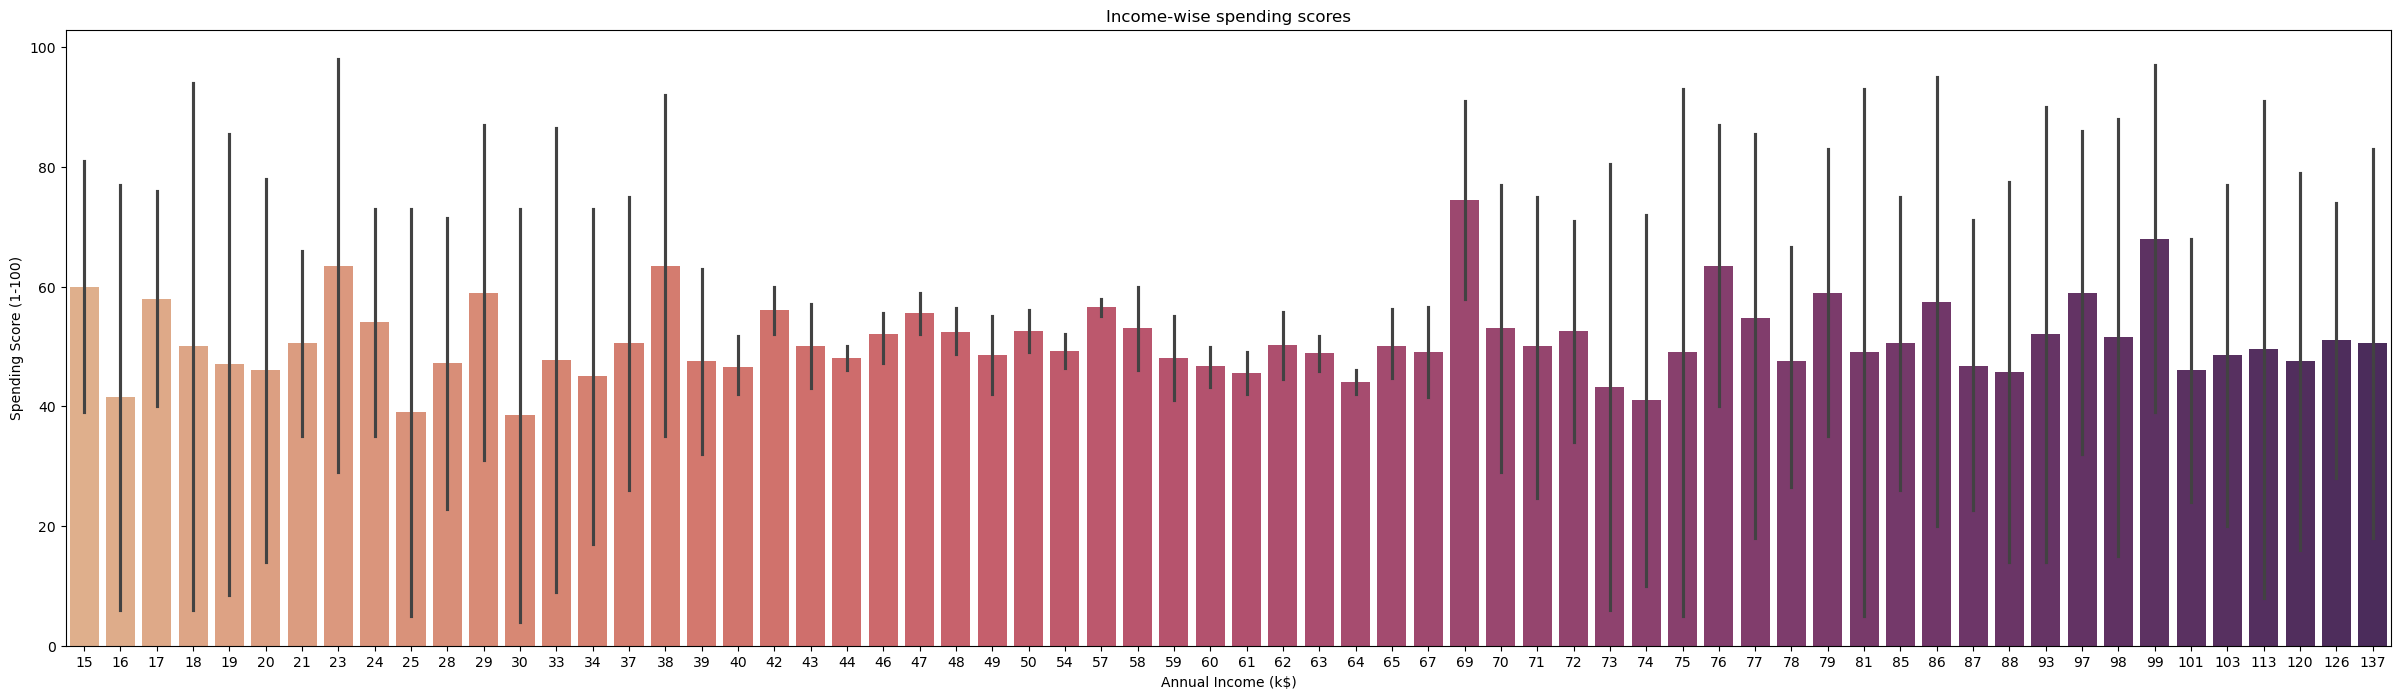

In [17]:
plt.figure(figsize=(30, 8))
plt.title('Income-wise spending scores')
sns.barplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], palette='flare')
plt.show()

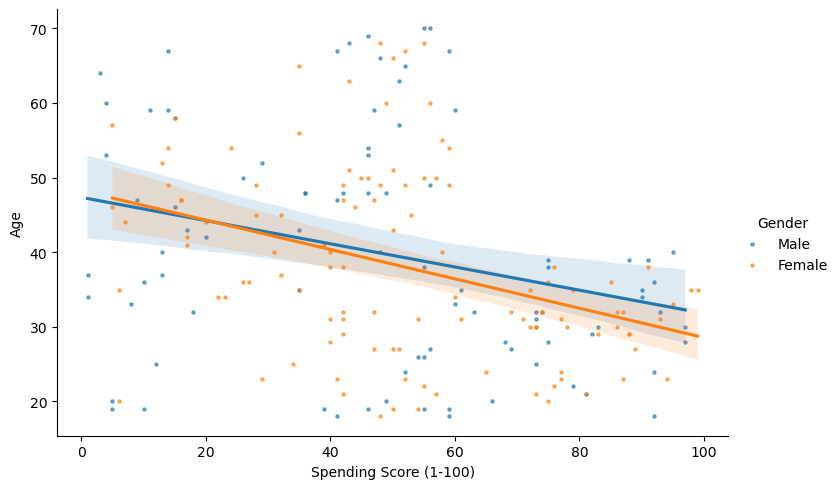

In [18]:
sns.lmplot(data=data,x='Spending Score (1-100)', y='Age', hue='Gender',aspect=1.5,scatter_kws={'s': 5, 'alpha': 0.6})

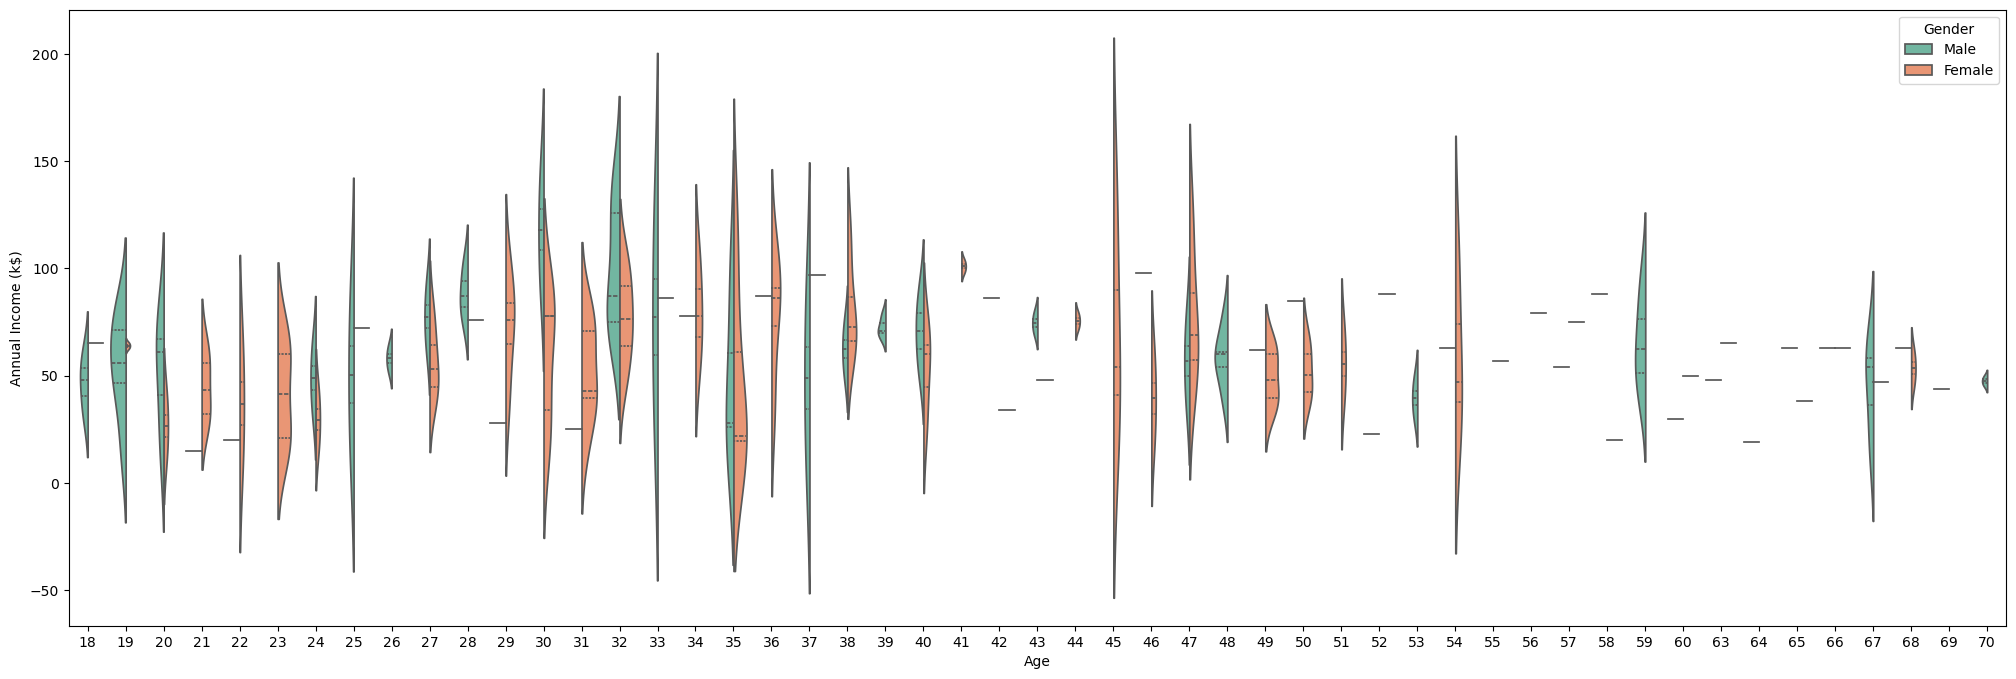

In [19]:
plt.figure(figsize=(25,8))
ax = sns.violinplot(x="Age", y="Annual Income (k$)", hue="Gender",data=data, palette="Set2", split=True,scale="count", inner="quartile")

In [20]:
import math  # math for ceil & floor 

In [21]:
mn=data['Annual Income (k$)'].min()-1
mx=data['Annual Income (k$)'].max()
data['Income score']=pd.Series([((x-mn)/(mx-mn))*100 for x in data['Annual Income (k$)']]) #finding the normalization (0-100)

In [22]:
data['Income score']=data['Income score'].apply(lambda x: math.ceil(x)  if (x%1)>0.5 else math.floor(x)) 

In [23]:
data.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Income score  
0             1  
1             1  
2             2  
3             2  
4             2

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(data.Gender.drop_duplicates())
data.Gender = le.transform(data.Gender)


data.dtypes

CustomerID                int64
Gender                    int32
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
Income score              int64
dtype: object

Taking the mean values according to ages inorder to compare score and incomes.

In [26]:
df=data.groupby('Age').mean()
df.drop(columns=['Annual Income (k$)','CustomerID'],inplace=True)

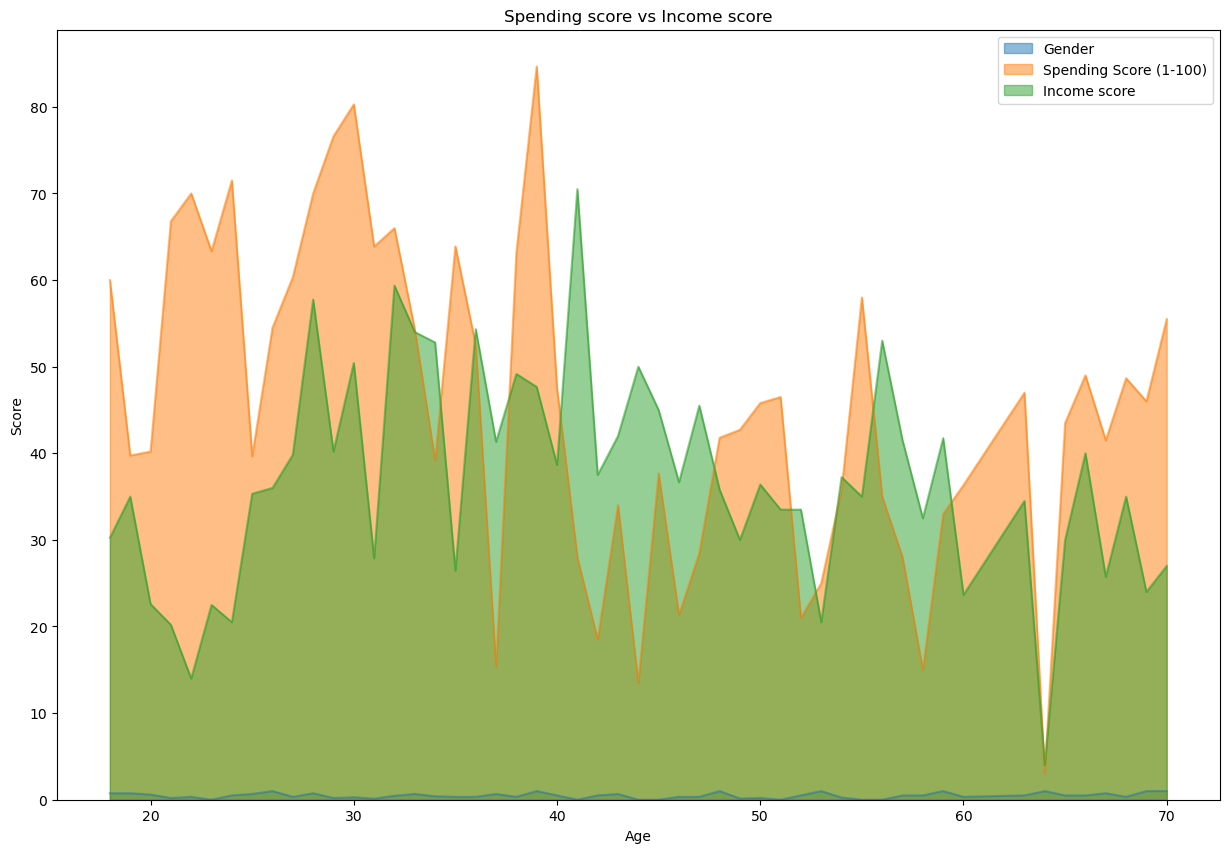

In [27]:

df.plot.area(use_index=True,stacked=False,figsize=(15, 10))

plt.ylabel('Score')

plt.title('Spending score vs Income score')
plt.show()

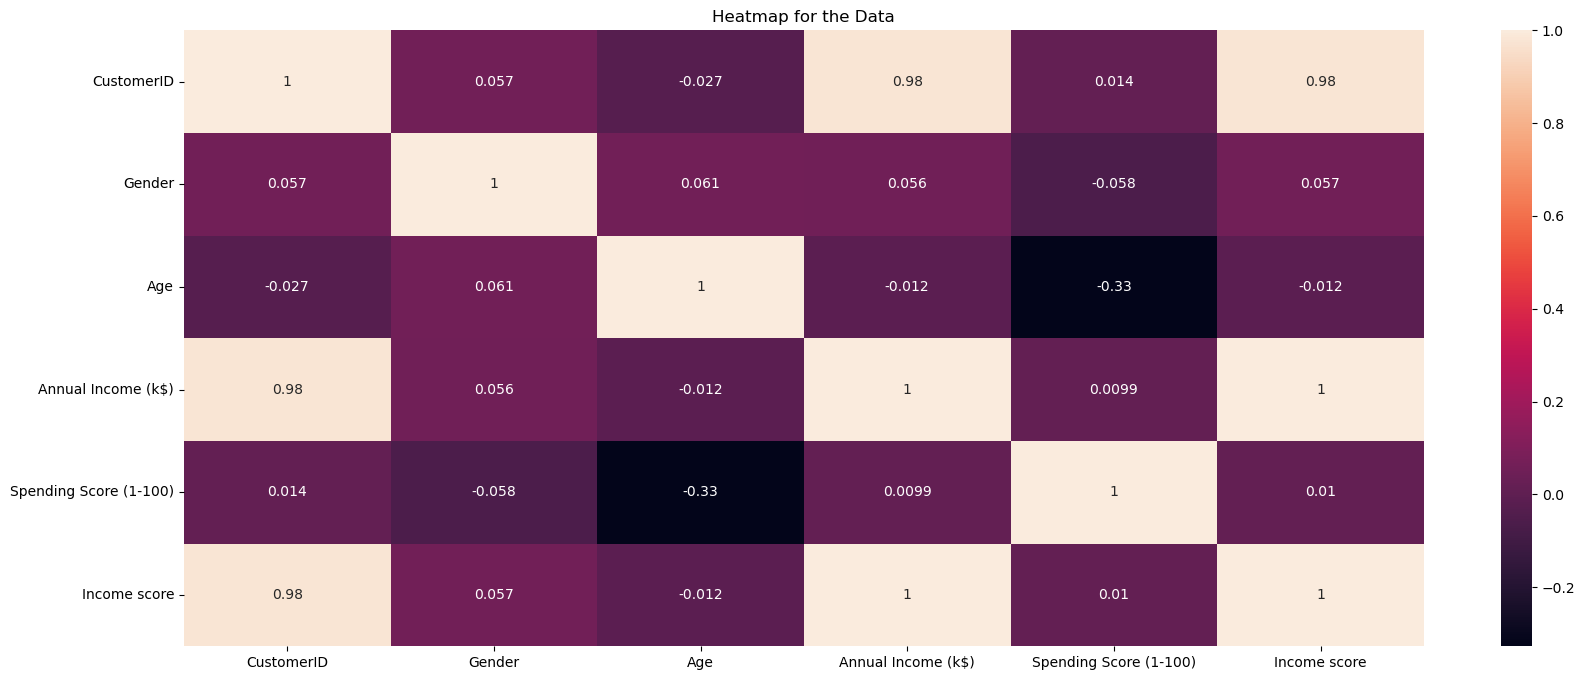

In [28]:
plt.figure(figsize = (20,8))
sns.heatmap(data.corr(), annot = True)
plt.title('Heatmap for the Data')
plt.show()

In [29]:
data.drop(columns=['CustomerID','Income score'],inplace=True) #drop the id and income score 

In [30]:
data['Gender']=data['Gender'].apply(lambda x: 1 if x=='Male' else 0)  #mapping gender as male=1 and female=0

In [31]:
from sklearn.cluster import KMeans   #sklearn for kmeans

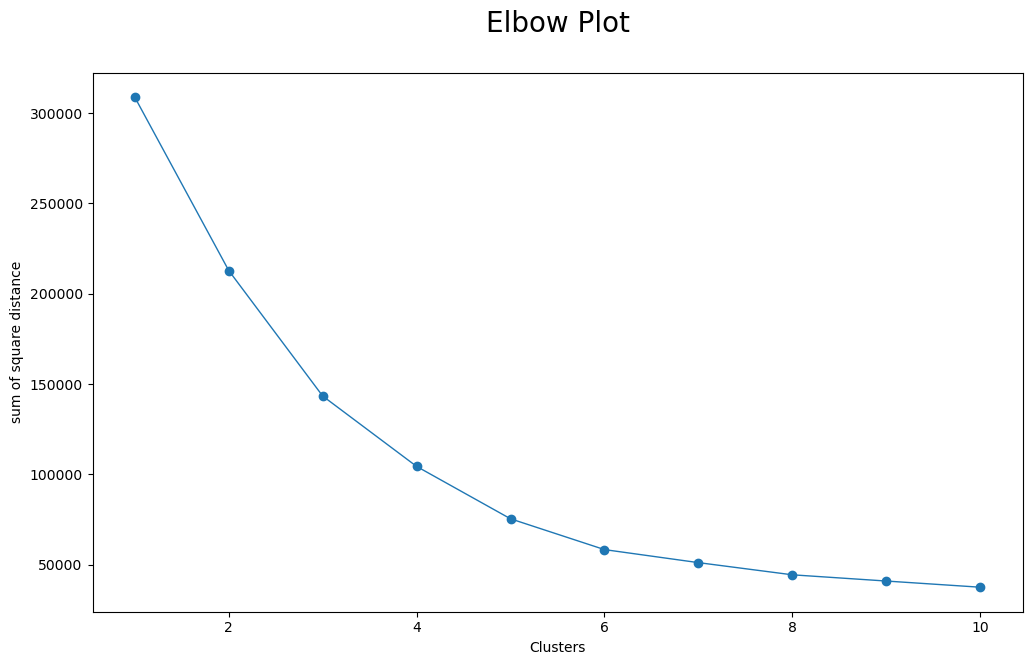

In [32]:
ssd = []            #store the sum of squared distance of sample from their cluster
k = range(1,11)     # taking k range from 1-11
for i in k:
  KModel = KMeans(n_clusters=i, init='k-means++',max_iter = 500, n_init = 15)
  KModel.fit(data)
  ssd.append(KModel.inertia_)      ## storing the inertia


#plot the inter for visualizing the elbow point 
plt.figure(figsize = (12, 7))
plt.plot(range(1, 11), ssd, linewidth = 1, marker = 'o')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('Clusters')
plt.ylabel('sum of square distance')
plt.show()

from above we can see the elbow point is at k=6 ,after which the curve almost become linear. This shows that we can define customer in 6 different categories.

In [34]:
#fit model for 6 clusters
KModel = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
labels = KModel.fit_predict(data)


In [35]:
print("labels:",labels,"\n\n\n cluser centroids:\n",KModel.cluster_centers_)

labels: [4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4
 5 4 5 3 5 3 0 4 5 3 0 0 0 3 0 0 3 3 3 3 3 0 3 3 0 3 3 3 0 3 3 0 0 3 3 3 3
 3 0 3 0 0 3 3 0 3 3 0 3 3 0 0 3 3 0 3 0 0 0 3 0 3 0 0 3 3 0 3 0 3 3 3 3 3
 0 0 0 0 0 3 3 3 3 0 0 0 2 0 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2] 


 cluser centroids:
 [[ 0.         27.         56.65789474 49.13157895]
 [ 0.         41.68571429 88.22857143 17.28571429]
 [ 0.         32.69230769 86.53846154 82.12820513]
 [ 0.         56.15555556 53.37777778 49.08888889]
 [ 0.         44.14285714 25.14285714 19.52380952]
 [ 0.         25.27272727 25.72727273 79.36363636]]


In [36]:
colors = sns.color_palette(None,len(np.unique(labels))) # creating colors for cluster visualization

In [37]:
colors

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354)]

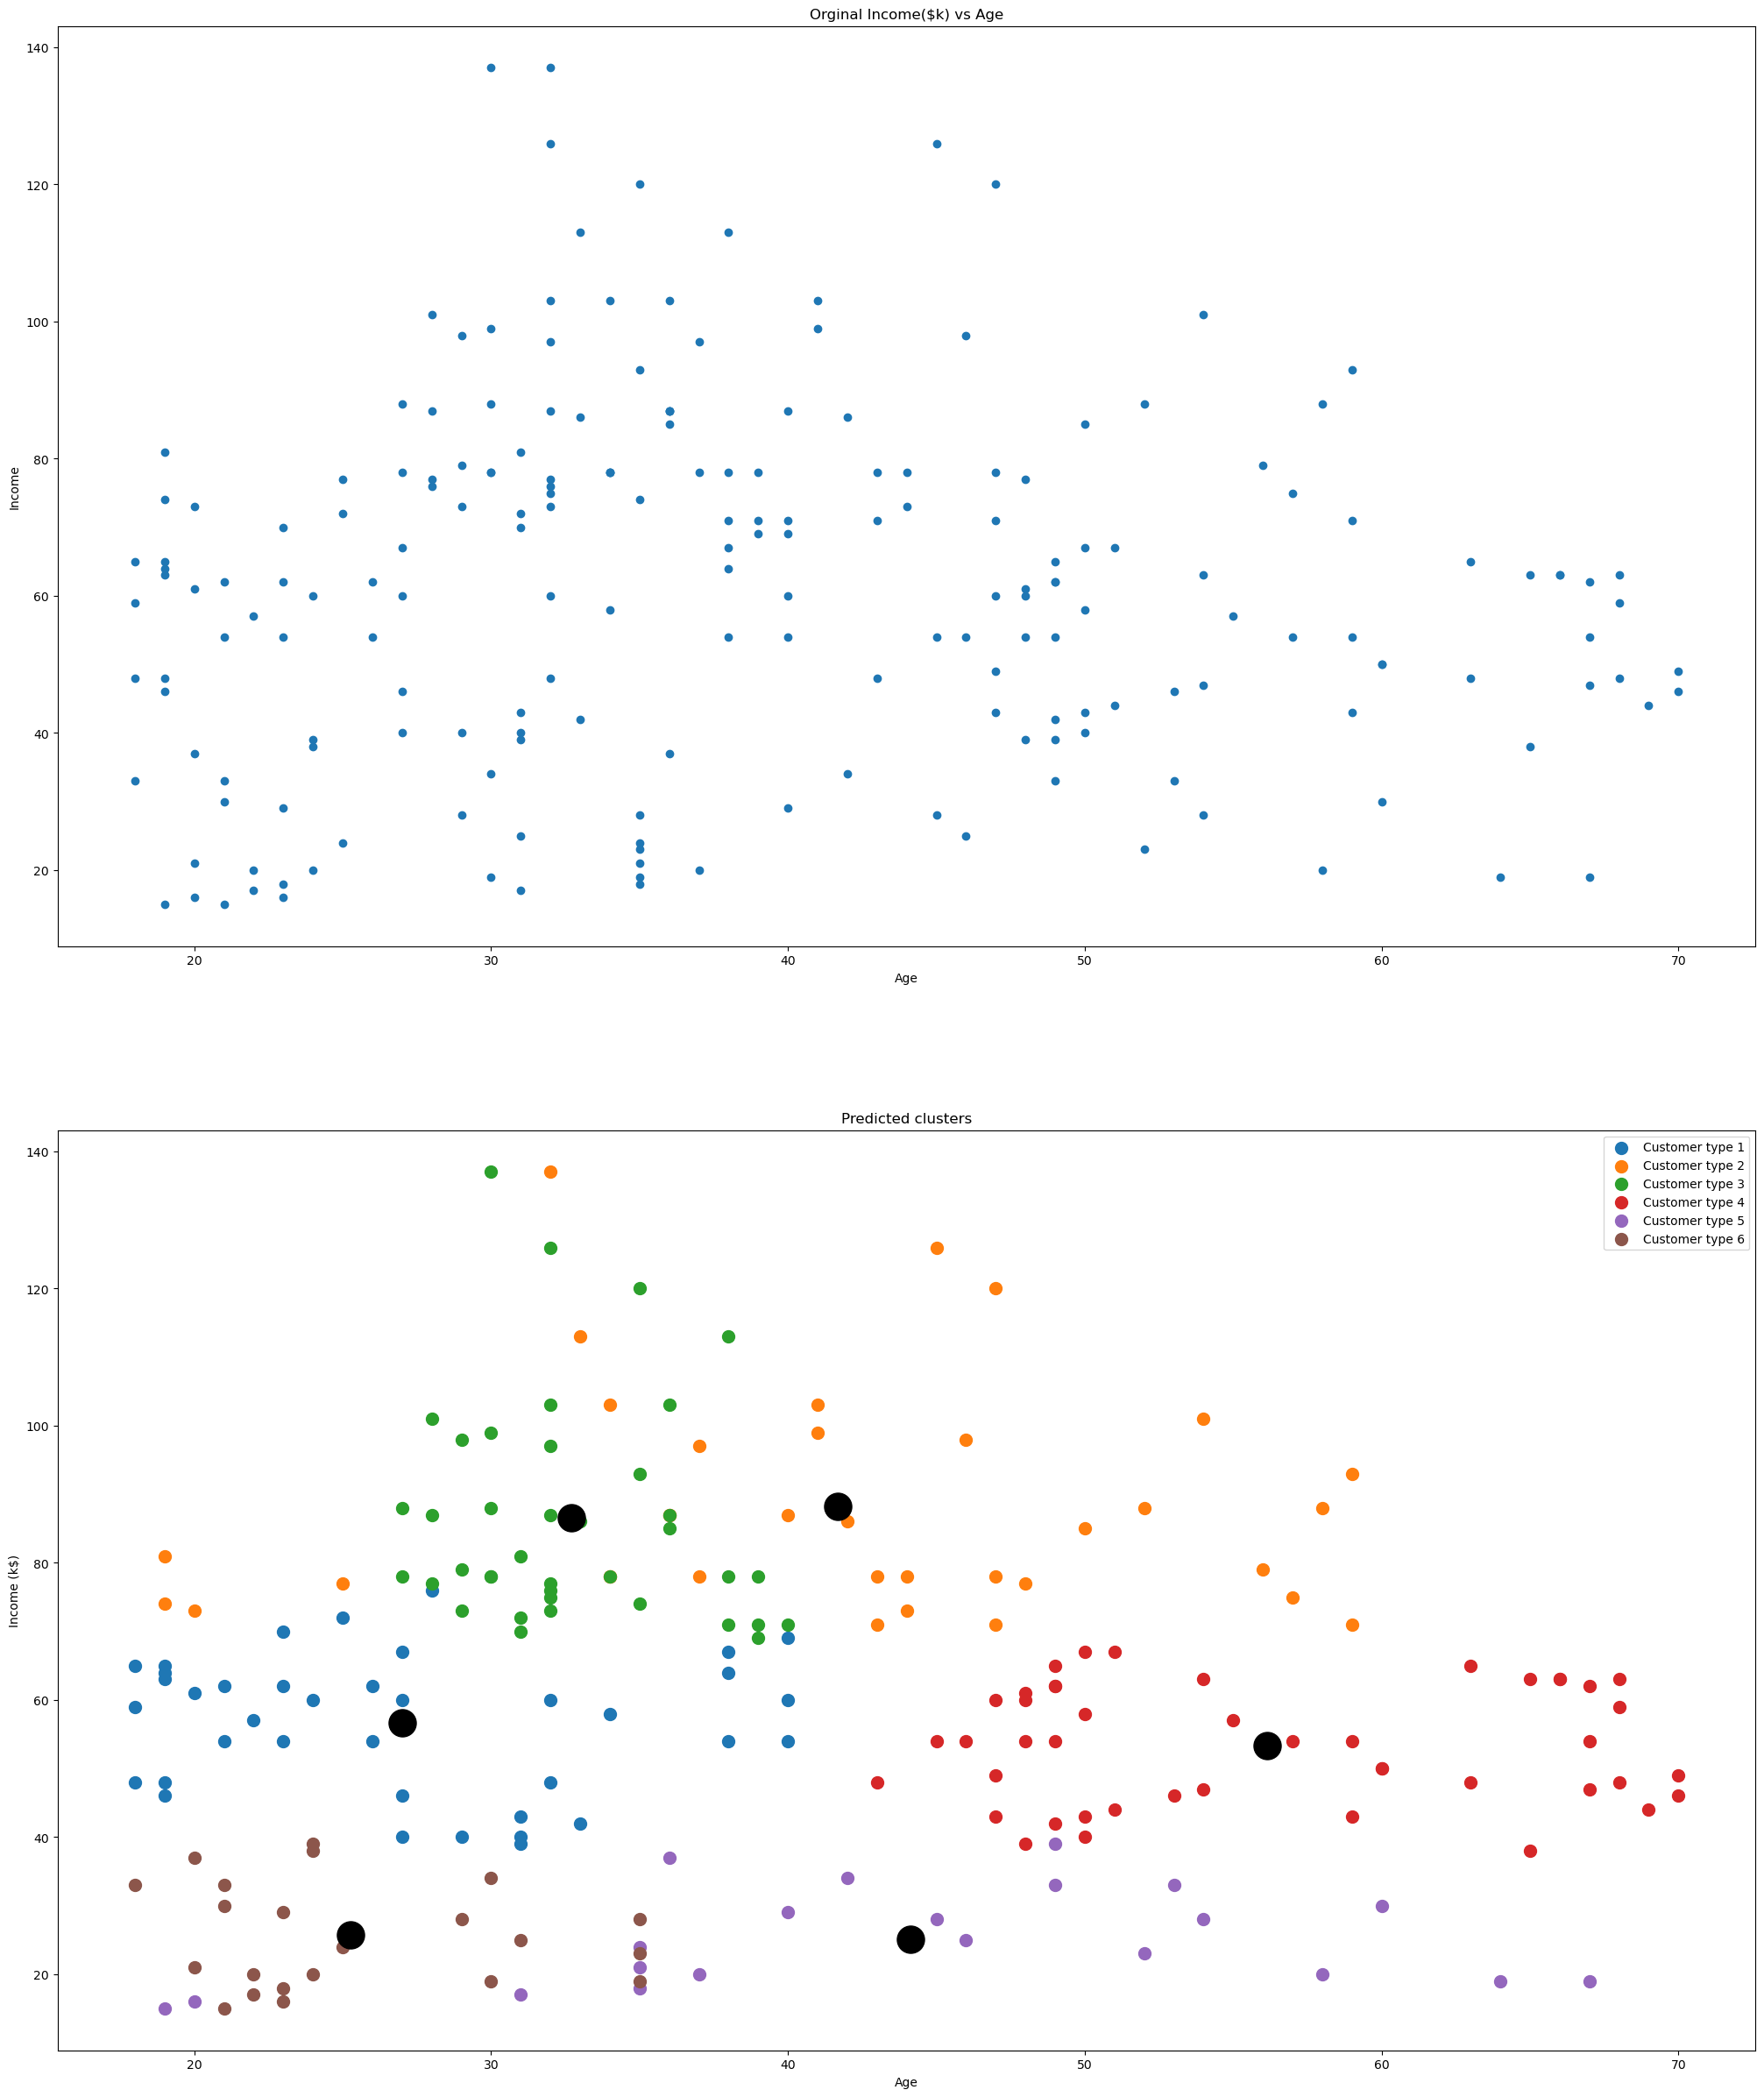

In [38]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(25,30))
#plotting original points for age vs income 
ax1.scatter(data=data,x='Age',y='Annual Income (k$)')
ax1.set_xlabel('Age')
ax1.set_ylabel('Income')
ax1.set_title('Orginal Income($k) vs Age')

#plotting the points according to their cluster value with different colrors 
for i in np.unique(labels):
    ax2.scatter(data[labels == i]['Age'] ,data[labels == i]['Annual Income (k$)'], s = 100, c = colors[i], label = 'Customer type '+str(i+1))
#ploting the kmeans centroids
ax2.scatter(KModel.cluster_centers_[:, 1], KModel.cluster_centers_[:, 2], s = 500, c = 'black')
   
ax2.set_title('Predicted clusters')
ax2.set_ylabel('Income (k$)')
ax2.set_xlabel('Age')
ax2.legend()
plt.show()

In [39]:
X=data.iloc[:,1:3]  # selecting 2 columns 

In [40]:
X.columns

Index(['Age', 'Annual Income (k$)'], dtype='object')

In [41]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300))
algorithm.fit(X)
labels1 = algorithm.labels_    #storing label
centroids1 = algorithm.cluster_centers_     #storing center

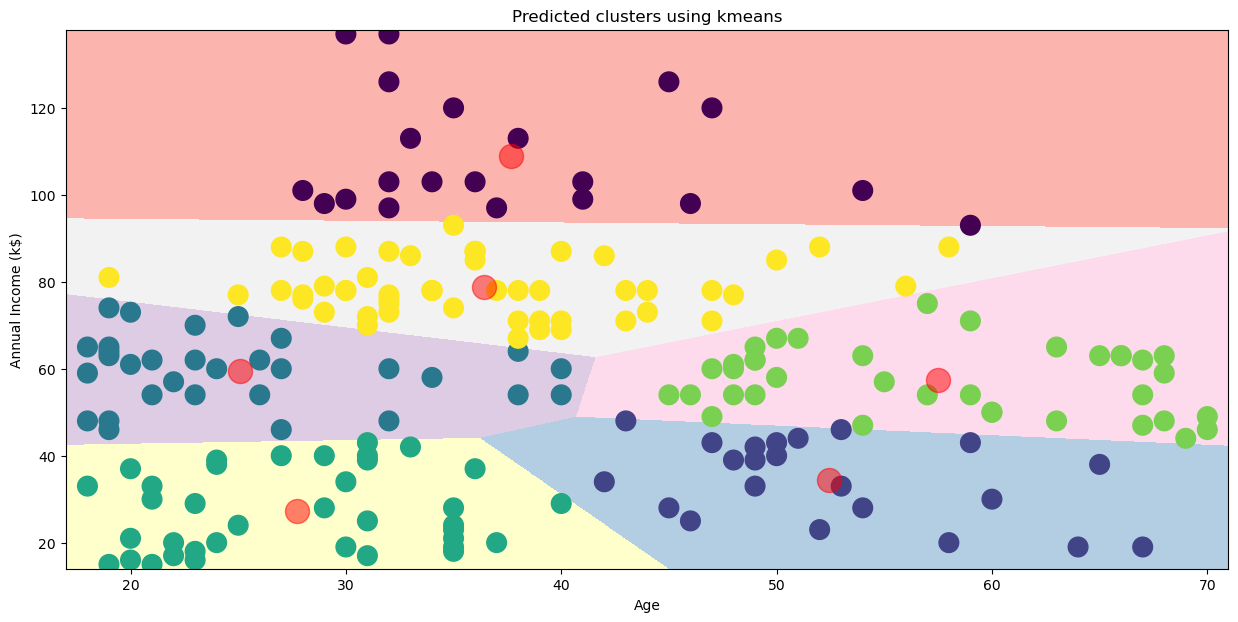

In [42]:
h = .02
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
#put the boundary points 
plt.imshow(Z , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()),cmap = plt.cm.Pastel1, aspect = 'auto', origin='lower')
#plot the datapoints 
plt.scatter( x = 'Age' ,y = 'Annual Income (k$)' , data = data , c = labels1 , 
            s = 200 )
#plot the centroids
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Annual Income (k$)') , plt.xlabel('Age')
plt.title('Predicted clusters using kmeans')
plt.show()

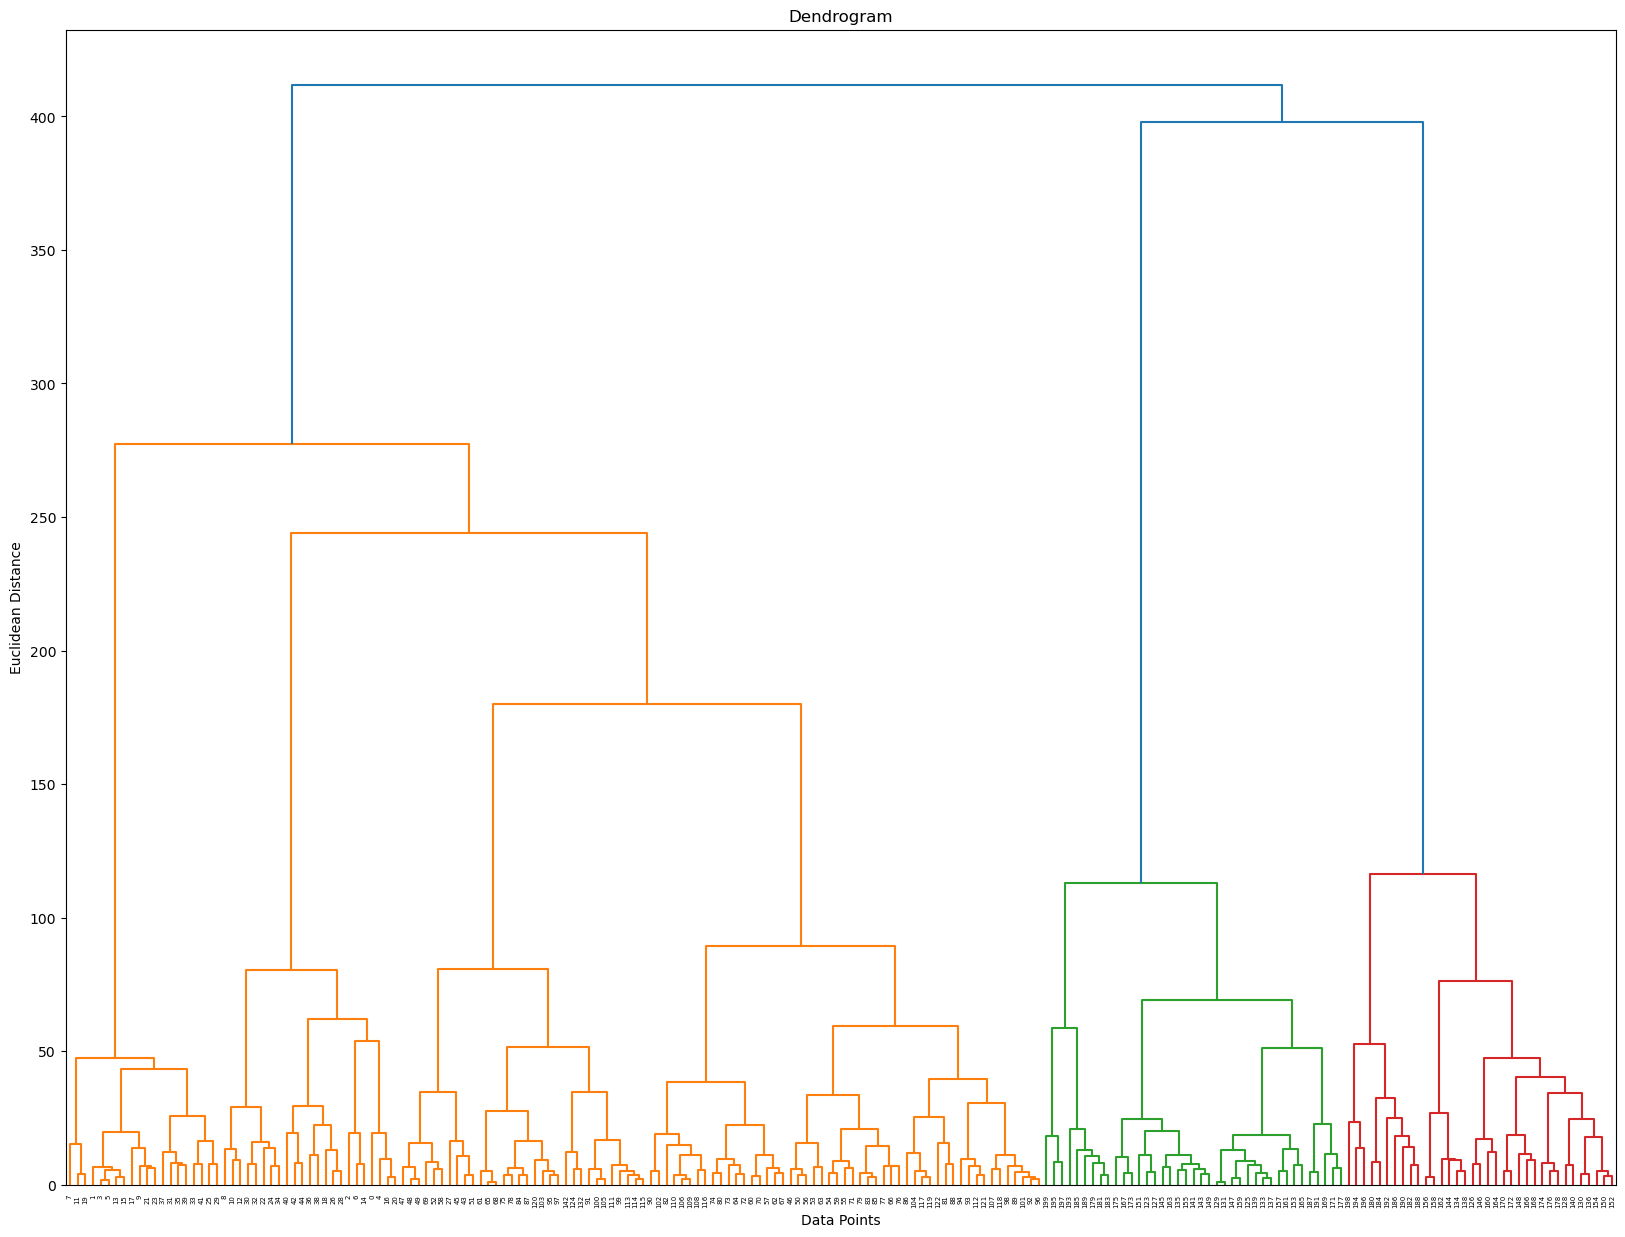

In [43]:
from scipy.cluster.hierarchy import linkage, dendrogram
merg = linkage(data, method="ward") # ward : mathematical expression
plt.figure(figsize=(20,15))
dendrogram(merg, leaf_rotation=90)  #plot the dendograms

plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.title("Dendrogram")
plt.show()

In [44]:
from sklearn.cluster import DBSCAN # import dbscan lib

In [45]:
# feature scaling the datapoints as dbscan is sentsitive to outlier and large distance amoing data points would be calculated
scaler = StandardScaler()
scaler.fit(data)
X = scaler.transform(data)

In [46]:
model = DBSCAN(eps=1,min_samples=5)         
cluster_labels = model.fit_predict(X)

In [47]:
cluster_labels

array([ 0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0], dtype=int64)

from above : -1 represents the outliers and other respresents the clustes

Now let's visualize these cluster in 3d as we would be having 3 features : 'Age','Income' and 'Spending Score'

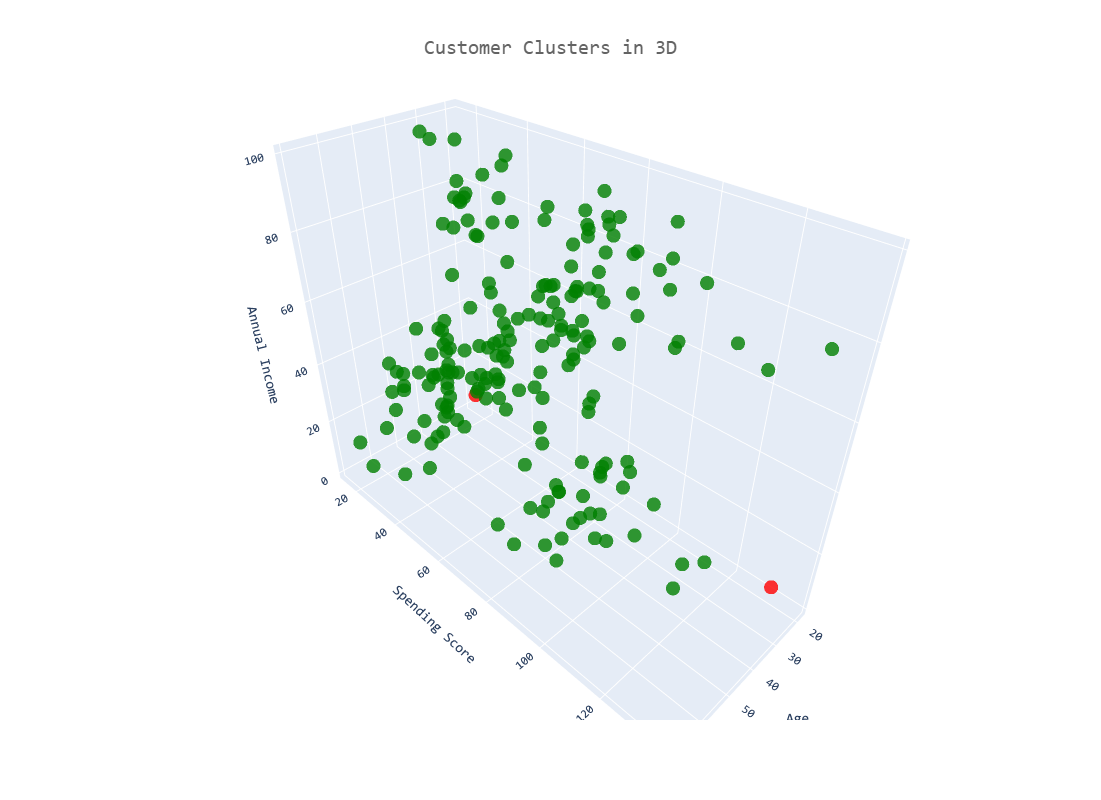

In [49]:
#plot the 3d scatter points 
fig = px.scatter_3d(x=data.iloc[:,1], y=data.iloc[:,2], z=data.iloc[:,3],
                    color=cluster_labels,opacity=0.8,
                    color_continuous_scale=['red','blue','green'],
                    width=800,height=800)

fig.update_layout(font_family='monospace',scene = dict(xaxis = dict(title  = 'Age'),yaxis = dict(title  = 'Spending Score'),zaxis = dict(title  = 'Annual Income')),
    title=dict(text='Customer Clusters in 3D',x=0.5,y=0.95,
    font=dict(color='#636363',size=20)),
    coloraxis_showscale=False)
fig.show()

In [50]:
import pickle
filename = 'customer.sav'
pickle.dump(algorithm , open(filename, 'wb'))
# loading the saved model
loaded_model = pickle.load(open('customer.sav', 'rb'))